In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
IMG_SIZE= 256
EPOCHS=50
CHANNELS=3
BATCH_SIZE=32

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle= True,
    image_size= (IMG_SIZE,IMG_SIZE),
    batch_size= 32
)

Found 54305 files belonging to 38 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

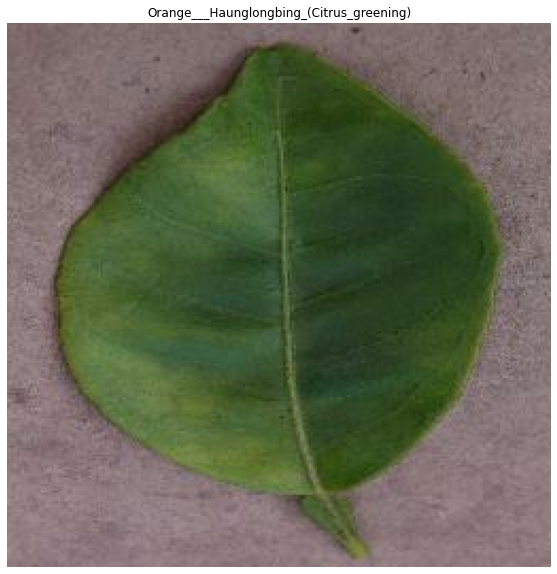

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.title(class_names[label_batch[0]])
  plt.axis("off")

In [ ]:
#split dataset
# 80% data as training and 10% for valid 10% for test

print(len(dataset))

train_size = 0.8
len(dataset)*train_size

#80% dataset as train_dataset
train_ds = dataset.take(54)
len(train_ds)


1698


54

In [ ]:
test_ds= dataset.skip(54)
len(test_ds)

1644

In [ ]:
val_size= 0.1
len(dataset)*val_size

169.8

In [ ]:
val_ds=test_ds.take(6) #valid_dataset
len(val_ds)

6

In [ ]:
test_ds= test_ds.skip(6)
len(test_ds)

1638

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)
  if shuffle:
    ds= ds.shuffle(shuffle_size,seed=12)
  
  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)

  train_ds= ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)

  test_ds=ds.skip(train_size).take(val_size)

  return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds= get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

1358

In [ ]:
len(val_ds)

169

In [ ]:
len(test_ds)

169

In [ ]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale= tf.keras.Sequential([                  
                     layers.experimental.preprocessing.Resizing(IMG_SIZE,IMG_SIZE),
                     layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
                   layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                   layers.experimental.preprocessing.RandomRotation(0.2)               
])

In [ ]:
input_shape=(BATCH_SIZE,IMG_SIZE,IMG_SIZE, CHANNELS)
n_classes=3

model = models.Sequential([
       resize_and_rescale,
       data_augmentation,
       layers.Conv2D(32,(3,3),activation='relu', input_shape= input_shape),
       layers.MaxPooling2D((2,2)),
       layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
       layers.MaxPooling2D((2,2)),
       layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
       layers.MaxPooling2D((2,2)),
       layers.Conv2D(64, (3,3), activation='relu'),
       layers.MaxPooling2D((2,2)),
       layers.Conv2D(64, (3,3), activation='relu'),
       layers.MaxPooling2D((2,2)),
       layers.Flatten(),
       layers.Dense(64, activation= 'relu'),
       layers.Dense(n_classes, activation= 'softmax')  ,              
])

model.build(input_shape= input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
his= model.fit(
    train_ds,
    epochs= EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data= val_ds
)

Epoch 1/50


Plot Graph

In [ ]:
score= model.evaluate(test_ds)

In [ ]:
score 

In [ ]:
his.params

In [ ]:
his.history.keys()

In [ ]:
acc= his.history['accuracy']
val_acc= his.history['val_accuracy']

loss= his.history['loss']
val_loss= his.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='TRAINING ACCURACY')
plt.plot(range(EPOCHS),val_acc,label='VALID ACCURACY')
plt.legend(loc='lower right')
plt.title('Training And Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='TRAINING LOSS')
plt.plot(range(EPOCHS),val_acc,label='VALID LOSS')
plt.legend(loc='upper right')
plt.title('Training And Validation Loss')
plt.show()



In [ ]:
import numpy as np

for image_batch,labels_batch in test_ds.take(1):

  first_img= image_batch[0].numpy().astype('uint8')
  plt.imshow(first_img)

  batch_prediction= model.predict(image_batch)
  print("Prediction: ", class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(1):
        #ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")



In [ ]:
model.save(f"/content/drive/MyDrive/Btech Final Project/Model_Code/{2}")